<a href="https://colab.research.google.com/github/PatienceMutede/Real-Estate-Price-Prediction/blob/main/Real_Estate_Price_Prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
from scipy.stats import spearmanr, kendalltau

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
from math import sqrt

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import norm
%matplotlib inline

In [ ]:
path= "/content/drive/MyDrive/Properties data -Dubai Properties Apartments.csv"

In [ ]:
df=pd.read_csv(path)

In [ ]:
df

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,7705450,Mohammed Bin Rashid City,25.176892,55.310712,1500000,1087,1379.94,2,2,Ultra,...,False,True,True,True,True,True,True,True,True,True
1901,7706287,Mohammed Bin Rashid City,25.166145,55.276684,1230000,760,1618.42,1,2,Medium,...,False,False,True,True,False,False,False,False,True,True
1902,7706389,Dubai Creek Harbour (The Lagoons),25.206500,55.345056,2900000,1930,1502.59,3,5,Medium,...,False,False,False,True,False,False,False,False,False,False
1903,7706591,Jumeirah Village Circle,25.073858,55.229844,675000,740,912.16,1,2,Medium,...,False,True,True,True,False,False,False,False,True,True


In [ ]:
df.shape

(1816, 16)

DATA CLEANING AND EXPLORATION

In [ ]:
df.drop(['longitude','latitude','id'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighborhood         1905 non-null   object 
 1   price                1905 non-null   int64  
 2   size_in_sqft         1905 non-null   int64  
 3   price_per_sqft       1905 non-null   float64
 4   no_of_bedrooms       1905 non-null   int64  
 5   no_of_bathrooms      1905 non-null   int64  
 6   quality              1905 non-null   object 
 7   maid_room            1905 non-null   bool   
 8   unfurnished          1905 non-null   bool   
 9   balcony              1905 non-null   bool   
 10  barbecue_area        1905 non-null   bool   
 11  built_in_wardrobes   1905 non-null   bool   
 12  central_ac           1905 non-null   bool   
 13  childrens_play_area  1905 non-null   bool   
 14  childrens_pool       1905 non-null   bool   
 15  concierge            1905 non-null   b

In [ ]:
df.replace({True:1,False:0})

,neighborhood,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,Palm Jumeirah,2700000,1079,2502.32,1,2,Medium,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,Palm Jumeirah,2850000,1582,1801.52,2,2,Medium,0,0,1,...,0,0,1,1,0,0,0,0,1,0
2,Jumeirah Lake Towers,1150000,1951,589.44,3,5,Medium,1,1,1,...,0,1,1,1,0,0,0,1,1,1
3,Culture Village,2850000,2020,1410.89,2,3,Low,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Palm Jumeirah,1729200,507,3410.65,0,1,Medium,0,0,0,...,0,1,1,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,Mohammed Bin Rashid City,1500000,1087,1379.94,2,2,Ultra,0,1,1,...,0,1,1,1,1,1,1,1,1,1
1901,Mohammed Bin Rashid City,1230000,760,1618.42,1,2,Medium,0,0,1,...,0,0,1,1,0,0,0,0,1,1
1902,Dubai Creek Harbour (The Lagoons),2900000,1930,1502.59,3,5,Medium,1,1,1,...,0,0,0,1,0,0,0,0,0,0
1903,Jumeirah Village Circle,675000,740,912.16,1,2,Medium,0,1,1,...,0,1,1,1,0,0,0,0,1,1


In [ ]:
df=df.replace({True:1,False:0})

In [ ]:
df

,neighborhood,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,Palm Jumeirah,2700000,1079,2502.32,1,2,Medium,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,Palm Jumeirah,2850000,1582,1801.52,2,2,Medium,0,0,1,...,0,0,1,1,0,0,0,0,1,0
2,Jumeirah Lake Towers,1150000,1951,589.44,3,5,Medium,1,1,1,...,0,1,1,1,0,0,0,1,1,1
3,Culture Village,2850000,2020,1410.89,2,3,Low,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Palm Jumeirah,1729200,507,3410.65,0,1,Medium,0,0,0,...,0,1,1,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,Mohammed Bin Rashid City,1500000,1087,1379.94,2,2,Ultra,0,1,1,...,0,1,1,1,1,1,1,1,1,1
1901,Mohammed Bin Rashid City,1230000,760,1618.42,1,2,Medium,0,0,1,...,0,0,1,1,0,0,0,0,1,1
1902,Dubai Creek Harbour (The Lagoons),2900000,1930,1502.59,3,5,Medium,1,1,1,...,0,0,0,1,0,0,0,0,0,0
1903,Jumeirah Village Circle,675000,740,912.16,1,2,Medium,0,1,1,...,0,1,1,1,0,0,0,0,1,1


Examining Neighborhood

In [ ]:
len(df.neighborhood.unique())

54

In [ ]:
df.neighborhood=df.neighborhood.apply(lambda x: x.strip())
neighborhood_stats=df.groupby('neighborhood')['neighborhood'].agg('count')
neighborhood_stats


neighborhood
Al Barari                             10
Al Barsha                              4
Al Furjan                             23
Al Kifaf                               7
Al Quoz                                1
Al Sufouh                              8
Arjan                                 11
Barsha Heights (Tecom)                 4
Bluewaters                             8
Business Bay                          97
City Walk                             14
Culture Village                       11
DAMAC Hills                           21
DIFC                                  31
Discovery Gardens                      8
Downtown Dubai                       302
Dubai Creek Harbour (The Lagoons)     38
Dubai Festival City                    5
Dubai Harbour                         30
Dubai Healthcare City                  2
Dubai Hills Estate                    53
Dubai Land                            11
Dubai Marina                         288
Dubai Production City (IMPZ)           8
Dub

Neighborhood with less than 100 properties

In [ ]:
len(neighborhood_stats[neighborhood_stats<=100])

49

In [ ]:
less_than_100= neighborhood_stats[neighborhood_stats<=100]

In [ ]:
less_than_100

neighborhood
Al Barari                            10
Al Barsha                             4
Al Furjan                            23
Al Kifaf                              7
Al Quoz                               1
Al Sufouh                             8
Arjan                                11
Barsha Heights (Tecom)                4
Bluewaters                            8
Business Bay                         97
City Walk                            14
Culture Village                      11
DAMAC Hills                          21
DIFC                                 31
Discovery Gardens                     8
Dubai Creek Harbour (The Lagoons)    38
Dubai Festival City                   5
Dubai Harbour                        30
Dubai Healthcare City                 2
Dubai Hills Estate                   53
Dubai Land                           11
Dubai Production City (IMPZ)          8
Dubai Residence Complex               1
Dubai Silicon Oasis                  12
Dubai South (Dubai World Ce

New variable (Other) created to group the neighborhood with less than 100 properties

In [ ]:
df.neighborhood= df.neighborhood.apply(lambda x: 'other' if x in less_than_100 else x)
len(df.neighborhood.unique())

6

In [ ]:
df.head()

,neighborhood,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,Palm Jumeirah,2700000,1079,2502.32,1,2,Medium,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,Palm Jumeirah,2850000,1582,1801.52,2,2,Medium,0,0,1,...,0,0,1,1,0,0,0,0,1,0
2,other,1150000,1951,589.44,3,5,Medium,1,1,1,...,0,1,1,1,0,0,0,1,1,1
3,other,2850000,2020,1410.89,2,3,Low,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Palm Jumeirah,1729200,507,3410.65,0,1,Medium,0,0,0,...,0,1,1,1,1,0,0,1,1,0


Key Variables to be used in the model are shown below

In [ ]:
df[['price','price_per_sqft','size_in_sqft','no_of_bedrooms','no_of_bathrooms','quality','neighborhood','private_pool',]]

,price,price_per_sqft,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality,neighborhood,private_pool
0,2700000,2502.32,1079,1,2,Medium,Palm Jumeirah,0
1,2850000,1801.52,1582,2,2,Medium,Palm Jumeirah,0
2,1150000,589.44,1951,3,5,Medium,other,0
3,2850000,1410.89,2020,2,3,Low,other,0
4,1729200,3410.65,507,0,1,Medium,Palm Jumeirah,0
...,...,...,...,...,...,...,...,...
1900,1500000,1379.94,1087,2,2,Ultra,other,0
1901,1230000,1618.42,760,1,2,Medium,other,0
1902,2900000,1502.59,1930,3,5,Medium,other,0
1903,675000,912.16,740,1,2,Medium,Jumeirah Village Circle,0


In [ ]:
df=df[['price','price_per_sqft','size_in_sqft','no_of_bedrooms','no_of_bathrooms','quality','neighborhood','private_pool',]]

In [ ]:
df

,price,price_per_sqft,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality,neighborhood,private_pool
0,2700000,2502.32,1079,1,2,Medium,Palm Jumeirah,0
1,2850000,1801.52,1582,2,2,Medium,Palm Jumeirah,0
2,1150000,589.44,1951,3,5,Medium,other,0
3,2850000,1410.89,2020,2,3,Low,other,0
4,1729200,3410.65,507,0,1,Medium,Palm Jumeirah,0
...,...,...,...,...,...,...,...,...
1900,1500000,1379.94,1087,2,2,Ultra,other,0
1901,1230000,1618.42,760,1,2,Medium,other,0
1902,2900000,1502.59,1930,3,5,Medium,other,0
1903,675000,912.16,740,1,2,Medium,Jumeirah Village Circle,0


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,1905.0,2.085830e+06,2.913200e+06,220000.00,890000.00,1400000.00,2200000.0,35000000.00
price_per_sqft,1905.0,1.327244e+03,6.684736e+02,361.87,870.92,1169.59,1622.5,4805.87
size_in_sqft,1905.0,1.417050e+03,8.914876e+02,294.00,840.00,1271.00,1703.0,9576.00
no_of_bedrooms,1905.0,1.793176e+00,9.494888e-01,0.00,1.00,2.00,2.0,5.00
no_of_bathrooms,1905.0,2.512861e+00,1.063117e+00,1.00,2.00,2.00,3.0,6.00
private_pool,1905.0,4.304462e-02,2.030109e-01,0.00,0.00,0.00,0.0,1.00


Price Analysis

In [ ]:
df.price.describe()

count    1.905000e+03
mean     2.085830e+06
std      2.913200e+06
min      2.200000e+05
25%      8.900000e+05
50%      1.400000e+06
75%      2.200000e+06
max      3.500000e+07
Name: price, dtype: float64

From the descriptive analysis given, the average price is 2 858 000 aed. Price is ranging from 220 000 aed upto 35 million,

<ipython-input-26-d0504ad6d9b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price)


<Axes: xlabel='price', ylabel='Density'>

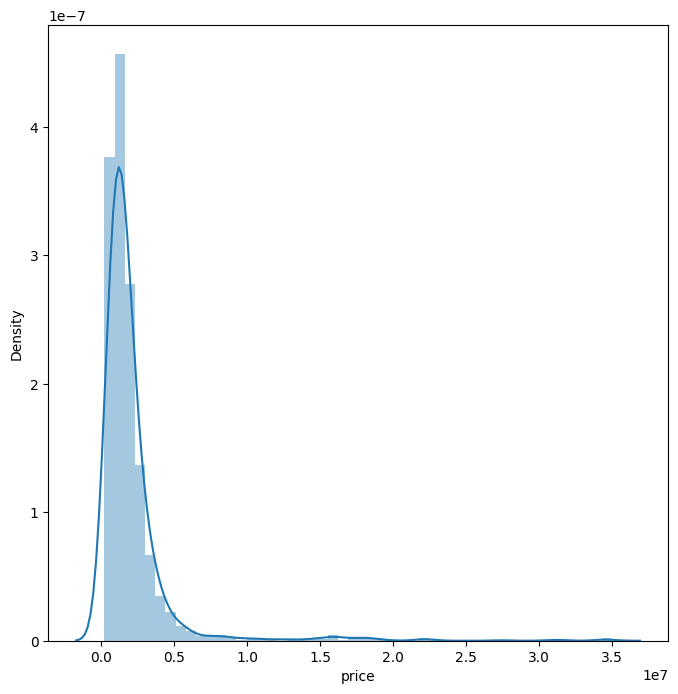

In [ ]:
fig, ax = plt.subplots(figsize = (8, 8))

sns.distplot(df.price)

In [ ]:
print("Skewness: %f" % df.price.skew())
print("Kurtosis: %f" % df.price.kurt())

Skewness: 6.147403
Kurtosis: 48.856572


There is an uneven distribution in our data. It is highly skewed, the uneven distibution can affect our prediction model. Our tails is starting from 5 million so we can see how many properties are above 5 million and if the number is small we can split the data and remove outliers to improve the distribution.

<Axes: >

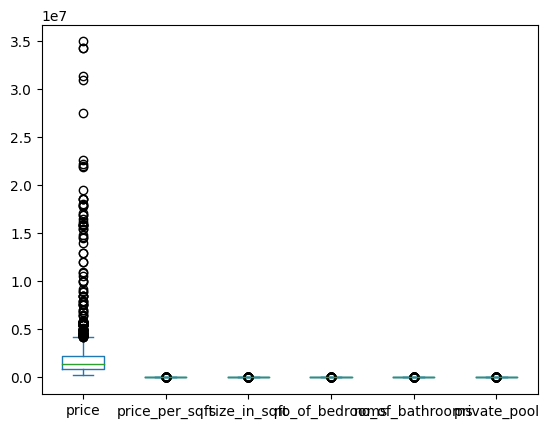

In [ ]:
df.plot.box()

In [ ]:
df_lessthan_5m = df[df.price < 5000000]
df_grthan_5m = df[df.price > 5000000]

In [ ]:
df_lessthan_5m.price.describe()

count    1.816000e+03
mean     1.587953e+06
std      9.508697e+05
min      2.200000e+05
25%      8.575000e+05
50%      1.389950e+06
75%      2.043860e+06
max      4.996000e+06
Name: price, dtype: float64

In [ ]:
df_grthan_5m.price.describe()

count    8.900000e+01
mean     1.224476e+07
std      7.448623e+06
min      5.045846e+06
25%      5.876888e+06
50%      9.209000e+06
75%      1.620000e+07
max      3.500000e+07
Name: price, dtype: float64

The above findings are very interesting, there are 1817 properties which are under 5 million and only 89 properties have price between 5 million to 35 million. Since the outlier of 89 properties is very small we will eliminate the 89 properties from the model.

In [ ]:
df= df[df.price < 5000001]

Plotting the distribution again after adjustments

<Axes: ylabel='Density'>

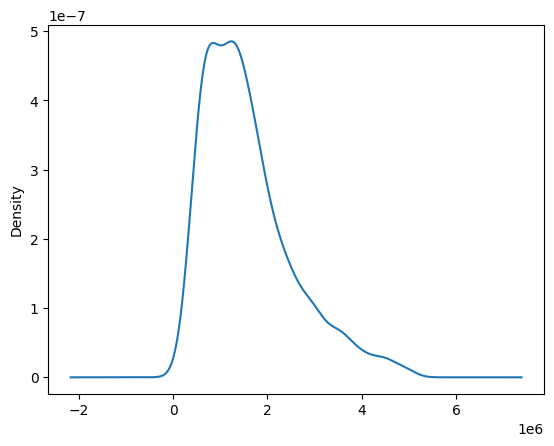

In [ ]:
df.price.plot.kde()

In [ ]:
print("Skewness: %f" % df.price.skew())
print("Kurtosis: %f" % df.price.kurt())

Skewness: 1.141478
Kurtosis: 1.067956


Now the the distribution is more even after removing outliers

Now we want to examine the most expensive neighnorhood in Dubai

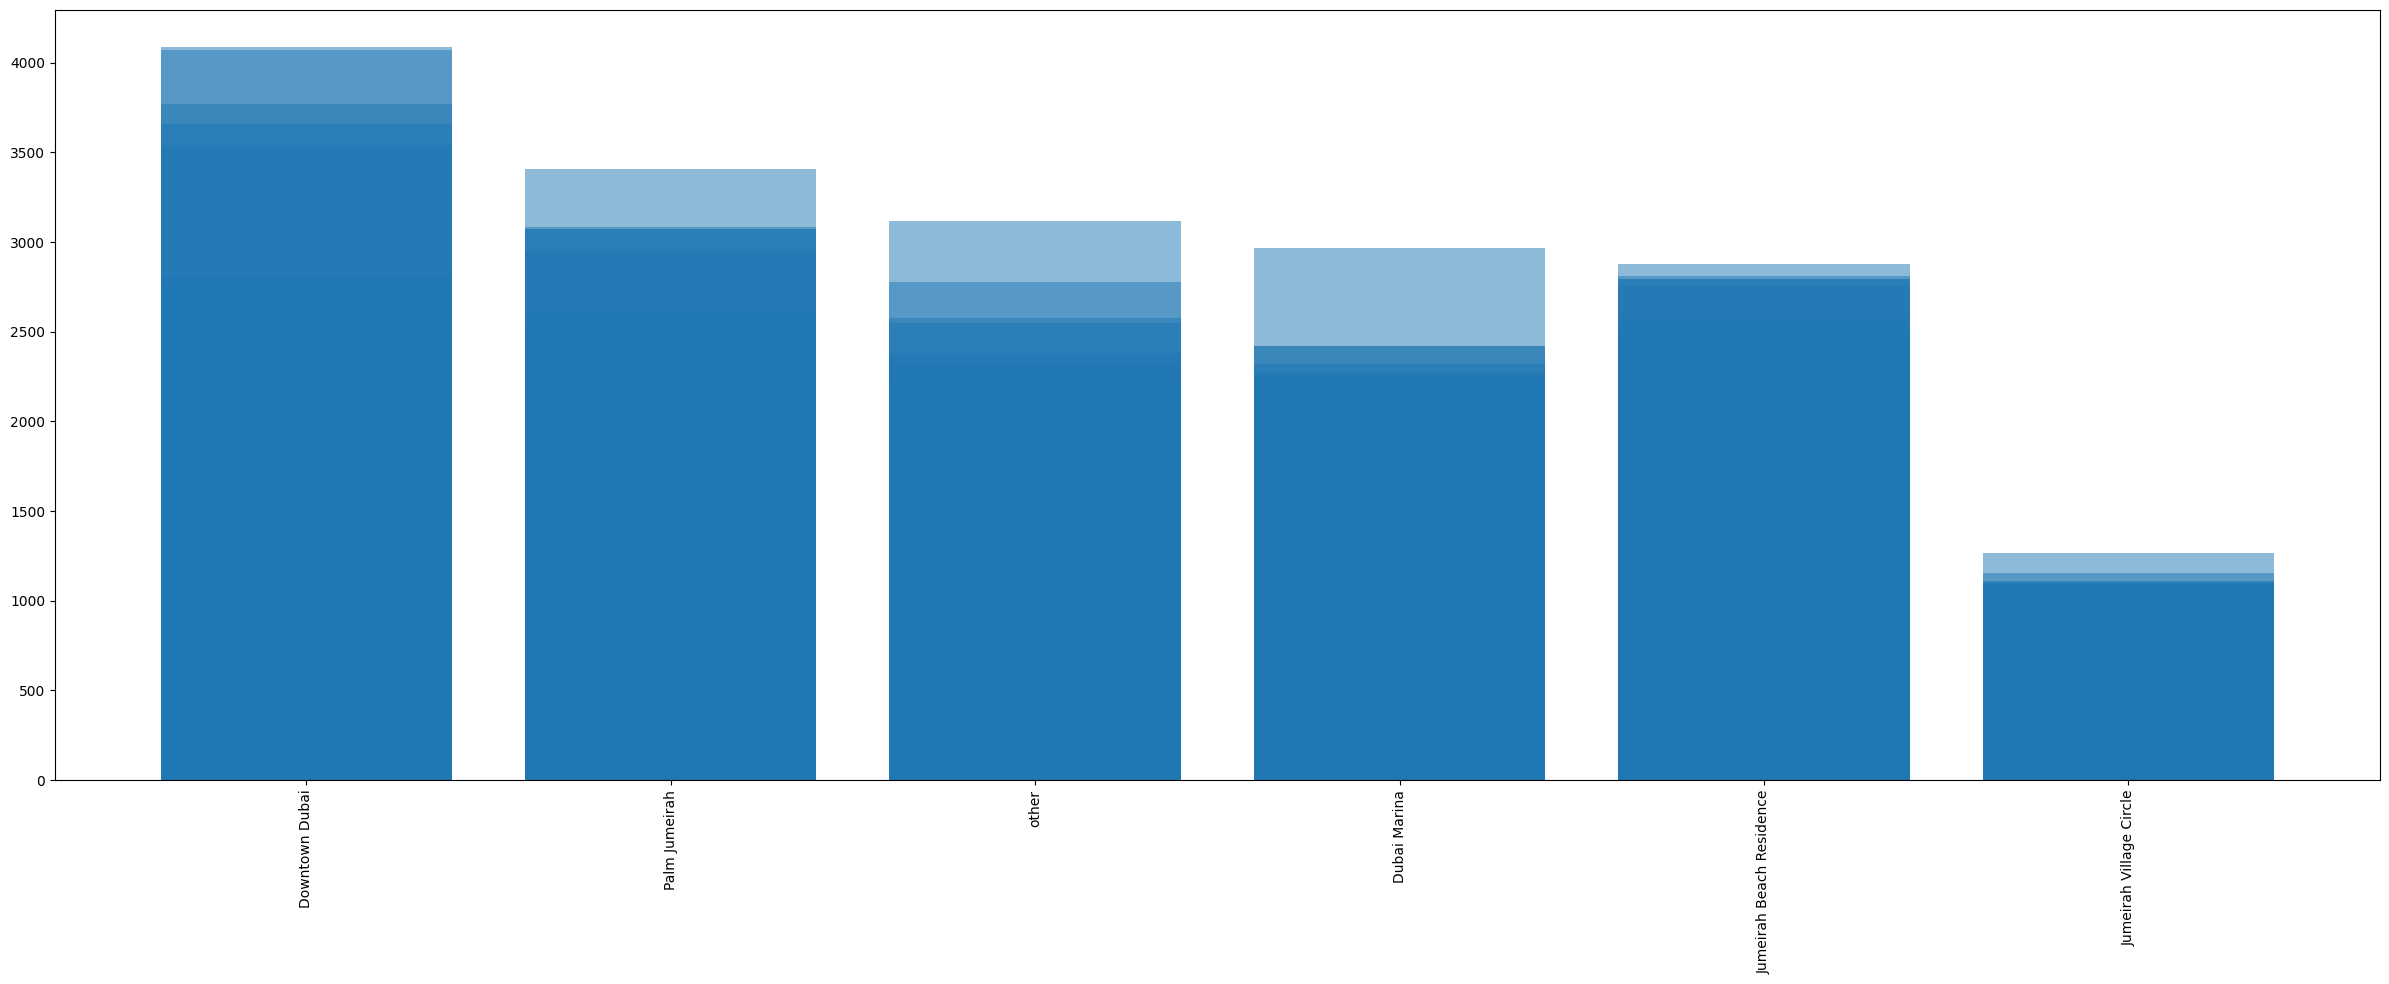

In [ ]:
df_neighborhood_price = df[['price_per_sqft', 'neighborhood']].sort_values(by=['price_per_sqft'], ascending = False)

plt.figure(figsize = (30, 10))
plt.bar(df_neighborhood_price.neighborhood, df_neighborhood_price.price_per_sqft, align='center', alpha=0.5)
plt.xticks(rotation='vertical')
plt.show()

The above plot shows the neighborhoof and the price per sqft, it can be seen that Downtown Dubai is most expensive, which makes sense, followed by Palm Jumeirah

<Axes: xlabel='size_in_sqft', ylabel='price'>

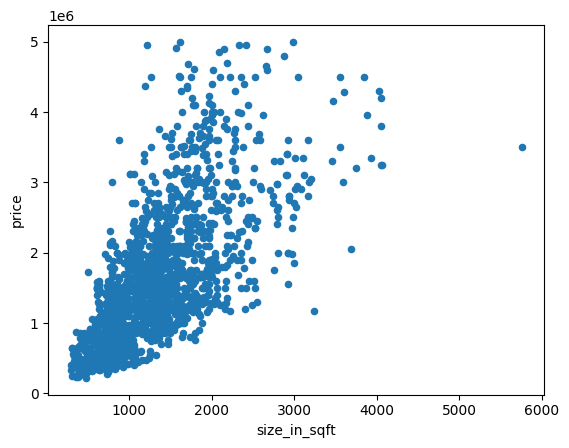

In [ ]:
df.plot.scatter(x='size_in_sqft',y='price')

  From the above scatter plot it is shown that as price increases the the price increases as well.

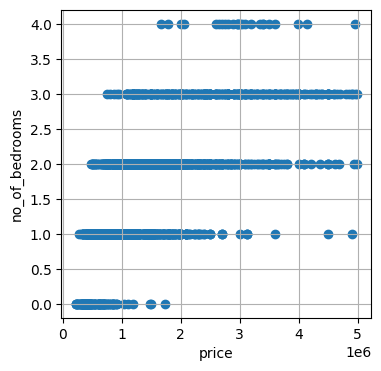

In [ ]:
plt.figure(figsize = (4, 4))

plt.scatter(df['price'], df['no_of_bedrooms'])
plt.xlabel('price')
plt.ylabel('no_of_bedrooms')
plt.grid(True)

From the above results it shows that 1 bedroom are ranging from 500 000 to 5 million depending on location but most of them are between 500 000 to 2.5 million. 2 bedrooms apartment are also ranging from 500 000 to 5 million depending on location, they are more evenly distributed across the range. 4 bedrooms are above 1 million upto 5 million.

Converting categorical values to dummies

In [ ]:
df = pd.get_dummies(df, columns=['neighborhood', 'quality'])

Data Spliting (Spliting Train and Test data to be used)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df['price'], test_size=0.2, random_state=42)

Fitting the Multiple Linear Regression Model

In [ ]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

Predicting Price Using Linear Regression

In [ ]:
y_pred = reg.predict(x_test)
print('Test R2 score:', r2_score(y_test, y_pred))
print('Test MSE score:', mean_squared_error(y_test, y_pred))

Test R2 score: 0.9187265445584696
Test MSE score: 73814773142.49934


In [ ]:
y_pred = reg.predict(x_test)

In [ ]:
y_pred

array([1902438.4208726 ,  751947.44064846,  863325.28739735,
       1330614.95536623,  437191.80107259, 2204388.05785566,
       1923649.70502924, 1155888.85060677,  511585.18669048,
        134261.0293798 , 2189124.76166413, 1739517.30289976,
        582162.92370501,  456467.82896484, 1568291.04100238,
        223213.13463591, 1339285.72336365, 3834077.8011736 ,
       1591503.74441438, 1403599.68198929,  209082.1177528 ,
       2367232.02519874, 1229857.33526308,  922892.3271169 ,
       -141662.8603398 , 1589440.60596234, 1662640.76521616,
        804822.72612075, 1291704.11049633, 4192043.51073917,
       1891835.43665845, 1438784.02798103, 1183718.78246433,
       1591548.44052347, 1794261.39849052, 1843957.00751395,
       1652994.26252969, -153431.00497159,  846653.63806246,
        845356.49642019, 2982657.82755909, 3048216.51265516,
       1663745.55554708,  593042.72132664, 1018141.71789835,
        -48037.18018754, 3874453.16935697, -156665.48525626,
       1854504.79406538,

<Axes: xlabel='price'>

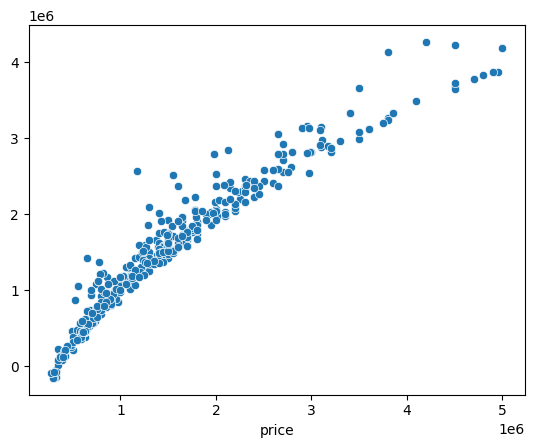

In [ ]:
sns.scatterplot(x=y_test,y=y_pred)



Fitting Random Forest Model

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred2 = rf_model.predict(x_test)
print('Test R2 score:', r2_score(y_test, y_pred2))
print('Test MSE score:', mean_squared_error(y_test, y_pred2))

Test R2 score: 0.991609850747742
Test MSE score: 7620162823.428655


<Axes: xlabel='price'>

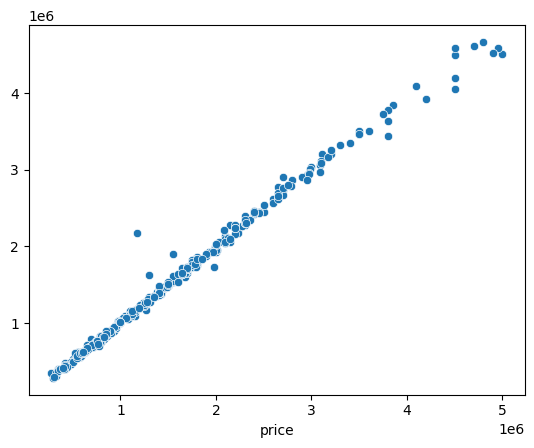

In [ ]:
sns.scatterplot(x=y_test,y=y_pred2)

Feature Importance

price_per_sqft                           0.441562
size_in_sqft                             0.555759
no_of_bedrooms                           0.000475
no_of_bathrooms                          0.000543
private_pool                             0.000055
neighborhood_Downtown Dubai              0.000167
neighborhood_Dubai Marina                0.000162
neighborhood_Jumeirah Beach Residence    0.000139
neighborhood_Jumeirah Village Circle     0.000081
neighborhood_Palm Jumeirah               0.000154
neighborhood_other                       0.000375
quality_High                             0.000060
quality_Low                              0.000215
quality_Medium                           0.000238
quality_Ultra                            0.000015
dtype: float64


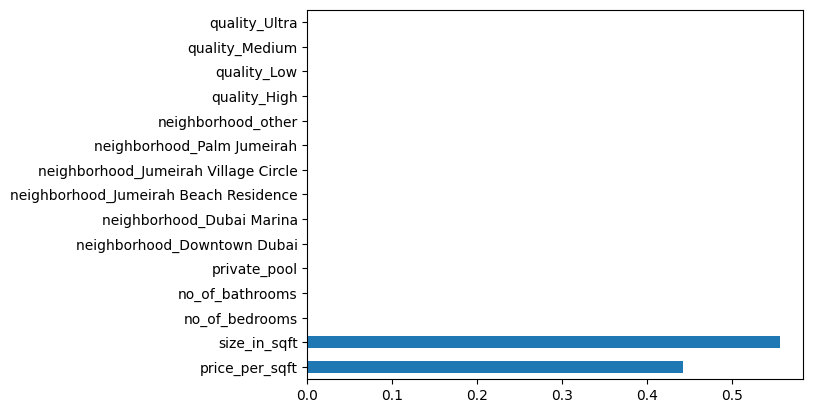

In [ ]:
importances = pd.Series(rf_model.feature_importances_, index=x_train.columns)
print(importances)
importances.plot(kind='barh')
plt.show()

RF model with OOB

OOB R2 score: 0.9921139635228847
OOB MSE score: 7114170517.331687
price_per_sqft                           0.441562
size_in_sqft                             0.555759
no_of_bedrooms                           0.000475
no_of_bathrooms                          0.000543
private_pool                             0.000055
neighborhood_Downtown Dubai              0.000167
neighborhood_Dubai Marina                0.000162
neighborhood_Jumeirah Beach Residence    0.000139
neighborhood_Jumeirah Village Circle     0.000081
neighborhood_Palm Jumeirah               0.000154
neighborhood_other                       0.000375
quality_High                             0.000060
quality_Low                              0.000215
quality_Medium                           0.000238
quality_Ultra                            0.000015
dtype: float64


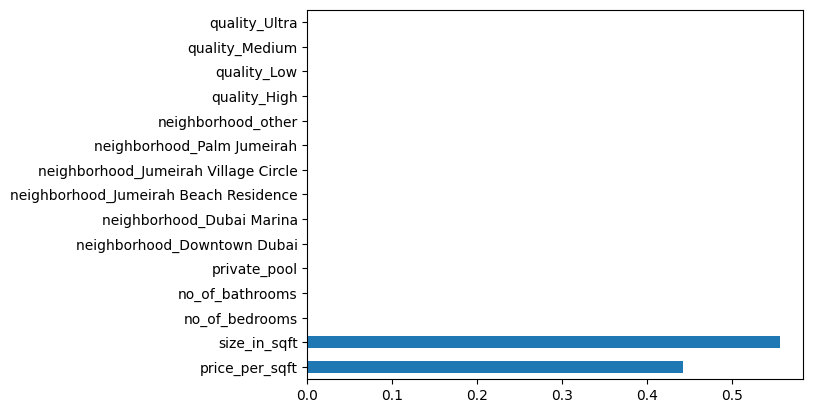

In [ ]:
# RF Model
rf_modelWithoob = RandomForestRegressor(random_state=42, oob_score=True)

# RF model fit with OOB
rf_modelWithoob.fit(x_train, y_train)

# Evaluate OOB score
print('OOB R2 score:', rf_modelWithoob.oob_score_)
print('OOB MSE score:', mean_squared_error(y_train, rf_modelWithoob.oob_prediction_))

# Obtain feature importances and plot them
importances = pd.Series(rf_modelWithoob.feature_importances_, index=x_train.columns)
print(importances)
importances.plot(kind='barh')
plt.show()

Defining the hyperparameters to tune (number of trees)

In [ ]:
param_grid = {
    'n_estimators': [5, 10, 15, 20]
    #,'max_depth': [None, 2, 5, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:

scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}
print(scoring)


{'R2': 'r2', 'MSE': 'neg_mean_squared_error'}


Performing the Grid Search with cross-validation

In [ ]:
grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=5, scoring=scoring, refit='R2')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'n_estimators': [5, 10, 15, 20]}, refit='R2',
             scoring={'MSE': 'neg_mean_squared_error', 'R2': 'r2'})

Evaluating the model on the test data set

In [ ]:
y_pred = grid_search.predict(x_test)
print('Test R2 score:', r2_score(y_test, y_pred))
print('Test MSE score:', mean_squared_error(y_test, y_pred))

Test R2 score: 0.9904559513992794
Test MSE score: 8668165743.611078


Best hyperparameters and corresponding R2 and MSE scores

In [ ]:
print('Best hyperparameters:', grid_search.best_params_)
print('Best R2 score:', grid_search.best_score_)
print('Best MSE score:', abs(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))

Best hyperparameters: {'n_estimators': 20}
Best R2 score: 0.9883413432390158
Best MSE score: 10488702344.58171


price_per_sqft                           0.441928
size_in_sqft                             0.555591
no_of_bedrooms                           0.000354
no_of_bathrooms                          0.000607
private_pool                             0.000023
neighborhood_Downtown Dubai              0.000171
neighborhood_Dubai Marina                0.000128
neighborhood_Jumeirah Beach Residence    0.000129
neighborhood_Jumeirah Village Circle     0.000070
neighborhood_Palm Jumeirah               0.000106
neighborhood_other                       0.000340
quality_High                             0.000061
quality_Low                              0.000242
quality_Medium                           0.000236
quality_Ultra                            0.000013
dtype: float64


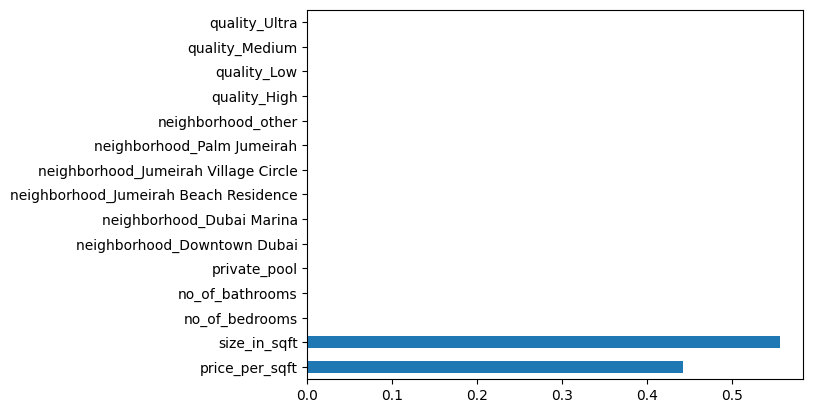

In [ ]:
importances = pd.Series(grid_search.best_estimator_.feature_importances_, index=x_train.columns)
print(importances)
importances.plot(kind='barh')
plt.show()

Decision Tree

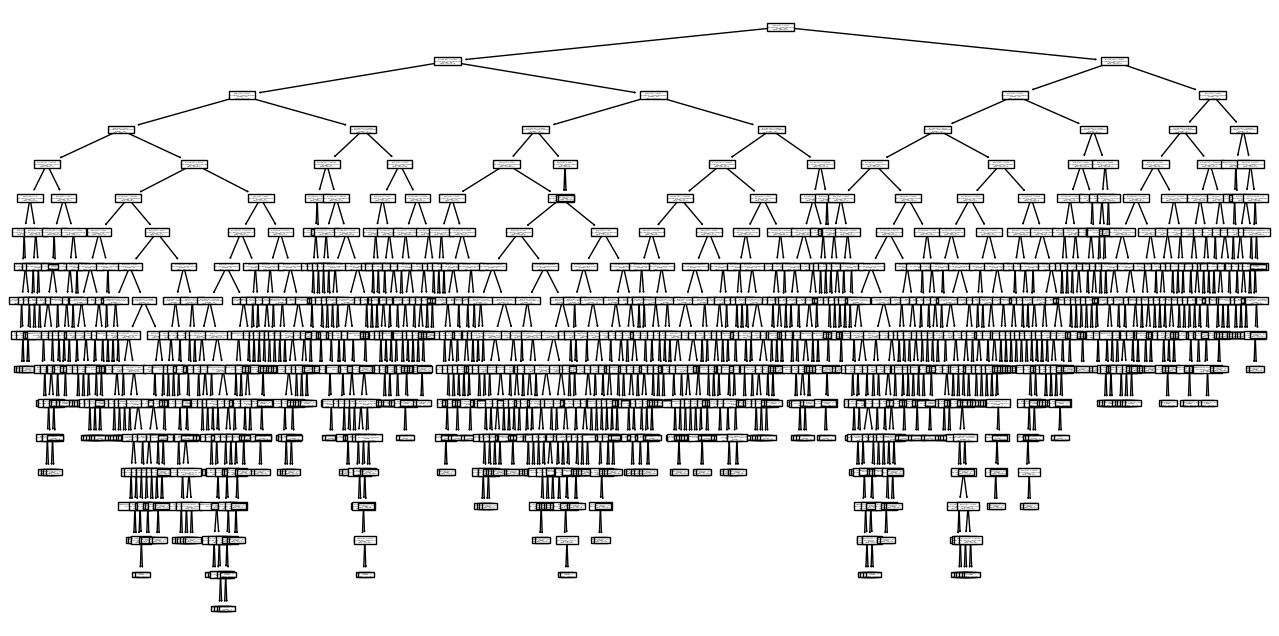

In [ ]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(16, 8))
plot_tree(grid_search.best_estimator_[0], ax=ax, feature_names=x_train.columns)
plt.show()

Grid Search with cross-validation

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too fe

Test R2 score: 0.9904559513992794
Test MSE score: 8668165743.611078


Best hyperparameters: {'n_estimators': 20}
Best R2 score: 0.9883413432390158
Best MSE score: 10488702344.58171


OOB score: 0.9905453301282884
OOB MSE score: 8529269912.411001
OOB R2 score: 0.9905453301282884


Feature importances based on OOB:
price_per_sqft                           0.441928
size_in_sqft                             0.555591
no_of_bedrooms                           0.000354
no_of_bathrooms                          0.000607
private_pool                             0.000023
neighborhood_Downtown Dubai              0.000171
neighborhood_Dubai Marina                0.000128
neighborhood_Jumeirah Beach Residence    0.000129
neighborhood_Jumeirah Village Circle     0.000070
neighborhood_Palm Jumeirah               0.000106
neighborhood_other                       0.000340
quality_High                             0.000061
quality_Low                              0.000242
quality_Medium                     

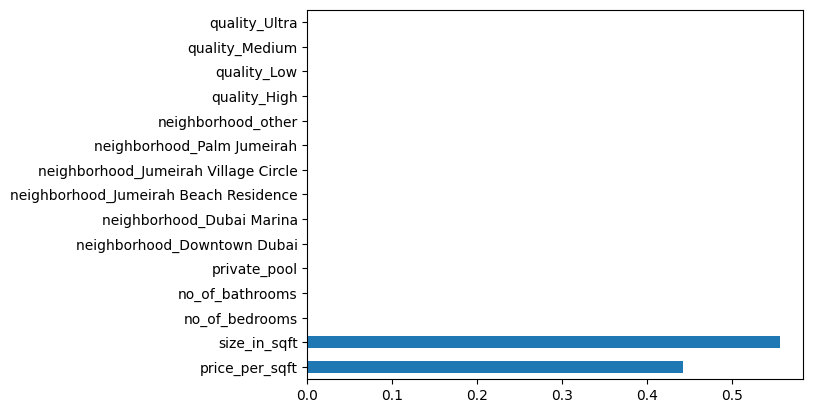

In [ ]:
grid_search = GridSearchCV(rf_modelWithoob, param_grid=param_grid, cv=5, scoring=scoring, refit='R2')
grid_search.fit(x_train, y_train)

# Evaluate model on test set
y_pred = grid_search.predict(x_test)
print('Test R2 score:', r2_score(y_test, y_pred))
print('Test MSE score:', mean_squared_error(y_test, y_pred))
print('\n')

# Display best hyperparameters and corresponding R2 and MSE scores
print('Best hyperparameters:', grid_search.best_params_)
print('Best R2 score:', grid_search.best_score_)
print('Best MSE score:', abs(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))
print('\n')

# Display OOB score and related statistics
print('OOB score:', grid_search.best_estimator_.oob_score_)
oob_predictions = grid_search.best_estimator_.oob_prediction_
print('OOB MSE score:', mean_squared_error(y_train, oob_predictions))
print('OOB R2 score:', r2_score(y_train, oob_predictions))
print('\n')

# Obtain feature importances and plot them
importances_oob = pd.Series(grid_search.best_estimator_.feature_importances_, index=x_train.columns)
print('Feature importances based on OOB:')
print(importances_oob)
importances_oob.plot(kind='barh')
plt.show()


Decision Tree

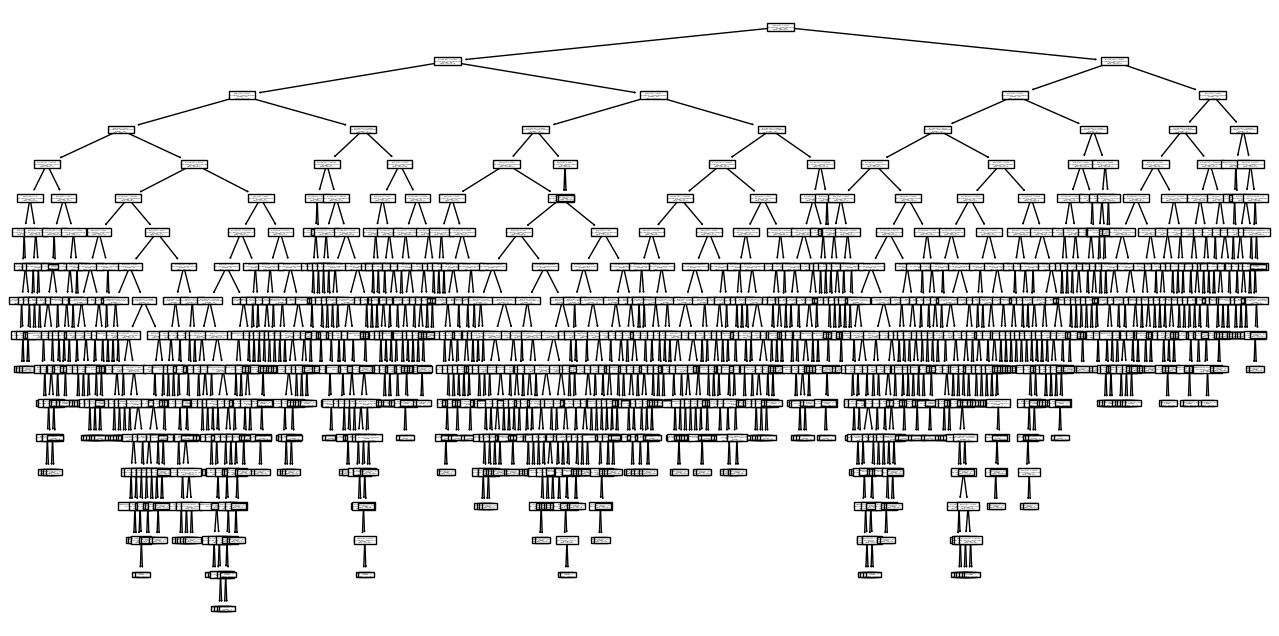

In [ ]:
# Display the decision tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(16, 8))
plot_tree(grid_search.best_estimator_[0], ax=ax, feature_names=x_train.columns)
plt.show()